In [1]:
from data_loader import DataLoader
import xgboost as xgb
import pandas as pd
import numpy as np
import os
import sys
from ml_util import *

dl = DataLoader('../data/')
x_train, x_valid, x_test, y_train, y_valid, y_test = dl.GetTrainValidTest()

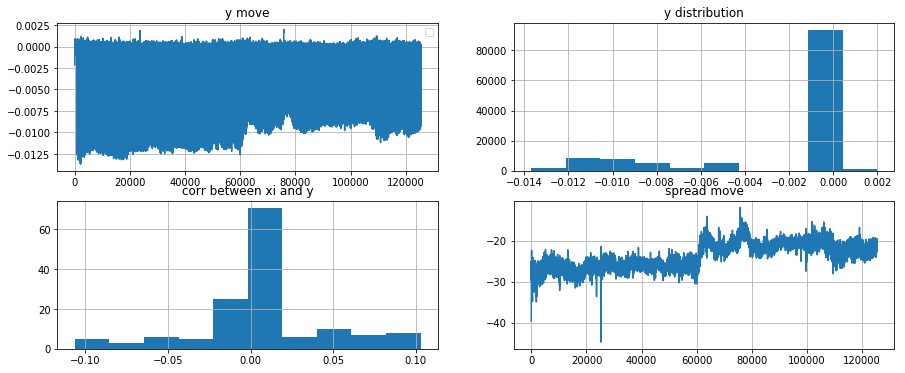

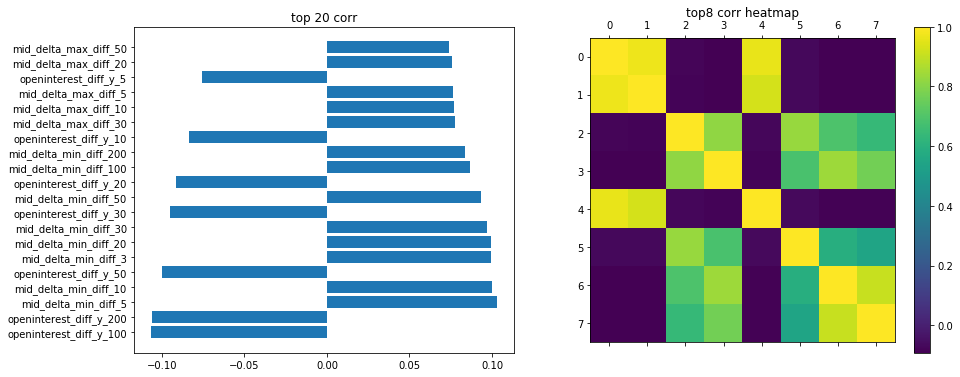

In [2]:
dl.Plot()

In [3]:
# xgboost model
model = xgb.XGBClassifier(max_depth=50, learning_rate=0.1, n_estimators=100, silent=False, objective='binary:logistic',
                          booster='gbtree', n_jobs=1, nthread=8, gamma=0, min_child_weight=1, max_delta_step=0,
                          subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1)
eval_set = [(x_train, y_train>0),(x_valid, y_valid>0)]
model.fit(x_train, y_train>0, eval_set=eval_set, verbose=True, eval_metric=['logloss', 'error'], early_stopping_rounds=5, )

y_onehot_pred = model.predict(x_test)
#model.get_booster().feature_names = dl.x_col

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


[0]	validation_0-logloss:0.63119	validation_0-error:0.086361	validation_1-logloss:0.672583	validation_1-error:0.364529
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.579748	validation_0-error:0.041685	validation_1-logloss:0.656619	validation_1-error:0.343748
[2]	validation_0-logloss:0.534264	validation_0-error:0.025764	validation_1-logloss:0.642642	validation_1-error:0.335875
[3]	validation_0-logloss:0.493465	validation_0-error:0.017616	validation_1-logloss:0.631277	validation_1-error:0.324662
[4]	validation_0-logloss:0.456766	validation_0-error:0.012732	validation_1-logloss:0.621952	validation_1-error:0.321971
[5]	validation_0-logloss:0.423644	validation_0-error:0.010016	validation_1-logloss:0.613344	validation_1-error:0.315593
[6]	validation_0-logloss:0.393655	validation_0-error:0.007737	validation_1-logloss:0.606415	validation_1-error:0.311805
[

[68]	validation_0-logloss:0.039084	validation_0-error:0	validation_1-logloss:0.604833	validation_1-error:0.284098
[69]	validation_0-logloss:0.038365	validation_0-error:0	validation_1-logloss:0.605519	validation_1-error:0.284198
[70]	validation_0-logloss:0.037678	validation_0-error:0	validation_1-logloss:0.606384	validation_1-error:0.283799
[71]	validation_0-logloss:0.037006	validation_0-error:0	validation_1-logloss:0.606996	validation_1-error:0.283799
[72]	validation_0-logloss:0.036362	validation_0-error:0	validation_1-logloss:0.607945	validation_1-error:0.28345
[73]	validation_0-logloss:0.035739	validation_0-error:0	validation_1-logloss:0.608448	validation_1-error:0.283301
[74]	validation_0-logloss:0.035132	validation_0-error:0	validation_1-logloss:0.609165	validation_1-error:0.284048
[75]	validation_0-logloss:0.034545	validation_0-error:0	validation_1-logloss:0.609844	validation_1-error:0.283949
[76]	validation_0-logloss:0.033963	validation_0-error:0	validation_1-logloss:0.610489	val

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion matrix, without normalization


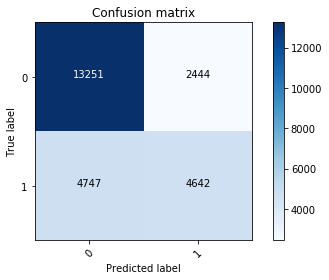

              precision    recall  f1-score   support

      class0       0.74      0.84      0.79     15695
      class1       0.66      0.49      0.56      9389

   micro avg       0.71      0.71      0.71     25084
   macro avg       0.70      0.67      0.68     25084
weighted avg       0.71      0.71      0.70     25084



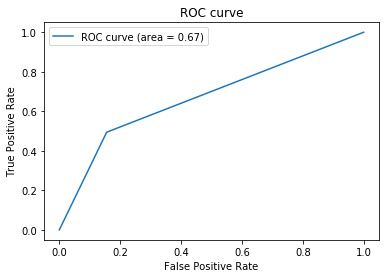

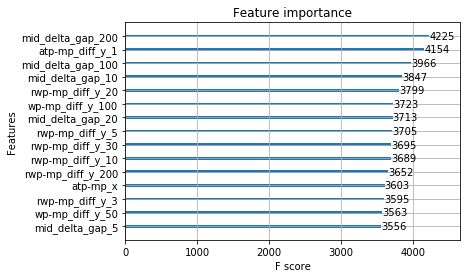

In [4]:
from ml_util import *
model.get_booster().feature_names = dl.x_col
a=ClsReport(model, y_test>0, y_onehot_pred, binary=True)